In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import collections
from IPython.display import display
import matplotlib.pyplot as plt

COUNT = 1
DISTANCE_WEIGHTED = 2

In [18]:
wine = pd.read_csv("winequality-red.csv")
wine_X = wine.iloc[:, 0:(wine.shape[1] - 1)]
wine_X_norm = (wine_X - wine_X.mean()) / (wine_X.max() - wine_X.min())

In [19]:
X = np.array(wine_X)
y = np.array(wine["class"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [20]:
def euclidian_distance(A, B):
    if not (A.ndim == 1 and B.ndim == 1):
        raise ValueError("Both numpy arrays should be single rows (1 dimensional).")
    return np.sqrt(np.sum(np.square(A - B)))

In [21]:
def predict(train_X, labels, test, K, metric):
    distances = []
    for i, sample in enumerate(train_X):
        distance = euclidian_distance(sample, test)
        distances.append((distance, i))

    distances.sort()

    return predict_label(distances, labels, K, metric)

In [46]:
def predict_label(distances, labels, K, metric):
    if metric == COUNT:
        k_closest = [labels[x[1]] for x in distances[:K]]
        counts = collections.Counter(k_closest)
        return counts.most_common()[0][0], counts.most_common()[0][1] / K
    if metric == DISTANCE_WEIGHTED:
        label_sum = {}
        max_sum = -1
        count = 0
        for distance, index in distances:
            if distance == 0: continue
            if count == K: break
            count += 1
            label_sum[labels[index]] = label_sum.get(labels[index], 0) + (1 / distance)
            if label_sum[labels[index]] > max_sum:
                max_sum = label_sum[labels[index]]
                predicted_label = labels[index]
        print(predicted_label)
        if predicted_label == "Low":
            other_label = "High";
        else:
            other_label = "Low"
        if not other_label in label_sum:
            return None, None, None, None
        return predicted_label, max_sum / sum(label_sum.values()), other_label, label_sum[other_label] / sum(label_sum.values())

In [47]:
def kNN(X_train, y_train, X_test, y_test, K, metric):
    predicted = []
    for i, test in enumerate(X_test):
        predicted_class, posterior, other_class, other_posterior = predict(X_train, y_train, test, K, metric)
        if predicted_class == None:
            continue
        actual_class = y_test[i]
        predicted.append((actual_class, predicted_class, posterior, other_class, other_posterior))
    
    prediction = pd.DataFrame.from_records(predicted, columns=["Actual", "Predicted", "Posterior", "OtherClass", "OtherPosterior"])
    
    return prediction

In [48]:
def get_accuracy(prediction_df):
    return prediction_df[prediction_df["Actual"] == prediction_df["Predicted"]].shape[0] / prediction_df.shape[0]

In [51]:
(kNN(X_train, y_train, X_test, y_test, 24, DISTANCE_WEIGHTED)).head()

Low
Low
High
High
High
High
Low
Low
High
High
High
Low
High
High
High
High
Low
Low
High
Low
High
Low
High
High
High
High
Low
Low
Low
High
Low
Low
Low
High
High
Low
High
High
High
High
High
Low
High
Low
High
High
High
High
Low
High
Low
Low
High
Low
Low
Low
High
Low
High
High
Low
High
Low
Low
High
High
High
Low
Low
High
High
Low
High
High
High
Low
Low
Low
Low
Low
Low
High
High
Low
High
High
Low
High
High
Low
Low
Low
High
High
Low
High
Low
High
Low
High
Low
Low
High
High
High
High
Low
Low
Low
Low
High
Low
High
Low
High
High
High
High
Low
High
High
High
High
Low
High
Low
High
Low
Low
High
High
Low
Low
High
High
Low
High
Low
High
High
High
High
High
High
Low
Low
High
High
Low
Low
High
High
Low
High
High
High
Low
High
High
High
High
Low
Low
Low
High
High
Low
High
Low
Low
Low
Low
High
High
Low
Low
High
Low
Low
High
Low
High
Low
High
Low
High
Low
High
High
High
High
High
Low
High
Low
High
High
Low
High
High
Low
Low
Low
Low
High
Low
Low
High
Low
High
Low
Low
High
High
High
High
High
High
Low
Lo

,Actual,Predicted,Posterior,OtherClass,OtherPosterior
0,High,Low,0.674372,High,0.325628
1,Low,Low,0.738706,High,0.261294
2,High,High,0.771743,Low,0.228257
3,Low,High,0.569071,Low,0.430929
4,High,High,0.681998,Low,0.318002


In [50]:
# Maximum accuracy is found at K = 38 for the euclidian distance measure.
def optimal_K(metric):
    K_candidates = range(1,50,2)
    errors = []
    for K in K_candidates:
        accuracy = get_accuracy(kNN(X_train, y_train, X_test, y_test, K, metric))
        errors.append(1 - accuracy)
    
    plt.plot(K_candidates, errors)
    plt.show()
    return np.where(errors==np.min(errors))

In [ ]:
K1 = optimal_K(COUNT)[0]
K2 = optimal_K(DISTANCE_WEIGHTED)[0]

In [ ]:
def kNN_sklearn():
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.metrics import accuracy_score

    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    return accuracy_score(y_test, pred)

kNN_sklearn()

In [9]:
X = np.array(wine_X_norm)
y = np.array(wine["class"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [10]:
get_accuracy(kNN(X_train, y_train, X_test, y_test, 4, COUNT))

0.7275

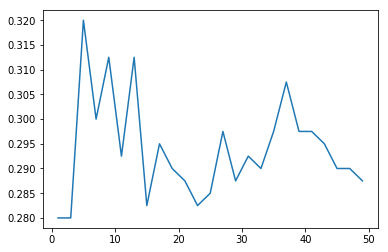

(array([0, 1]),)


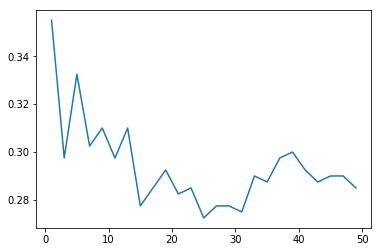

(array([12]),)


In [13]:
print(optimal_K(COUNT))
print(optimal_K(DISTANCE_WEIGHTED))